In [12]:
#Import library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display

In [ ]:
# Membaca dataset (misalnya, Online Retail)
# Load dataset
file_path = 'Online Retail.xlsx'
data = pd.ExcelFile(file_path)
df = data.parse('Online Retail')

# Mengambil subset hingga 20.000 baris
subset_df = df.sample(n=20000, random_state=42)  # Ambil 20.000 baris acak


# Menampilkan data subset dengan gaya tabel
display(subset_df.head(10))


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
209268,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom
207108,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom
167085,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom
471836,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16 10:39:00,1.95,17198.0,United Kingdom
115865,546157,22180,RETROSPOT LAMP,2,2011-03-10 08:40:00,9.95,13502.0,United Kingdom
465024,576200,82482,WOODEN PICTURE FRAME WHITE FINISH,2,2011-11-14 12:14:00,2.95,15572.0,United Kingdom
477777,577076,22614,PACK OF 12 SPACEBOY TISSUES,12,2011-11-17 15:08:00,0.39,14362.0,United Kingdom
367855,568909,22596,CHRISTMAS STAR WISH LIST CHALKBOARD,12,2011-09-29 13:38:00,1.25,16818.0,United Kingdom
491657,578072,21109,LARGE CAKE TOWEL CHOCOLATE SPOTS,1,2011-11-22 16:02:00,6.75,17759.0,United Kingdom
269641,560491,23297,SET 40 HEART SHAPE PETIT FOUR CASES,2,2011-07-19 10:51:00,1.65,12415.0,Australia


In [ ]:
# Cek nilai hilang
missing_values = df.isnull().sum()
print("Jumlah nilai hilang per kolom:\n", missing_values)

Jumlah nilai hilang per kolom:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [ ]:
# Mengatasi nilai hilang
# Contoh: menghapus semua baris dengan nilai hilang
df.dropna(inplace=True)
missing_values = df.isnull().sum()
print("Jumlah nilai hilang per kolom:\n", missing_values)

Jumlah nilai hilang per kolom:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [ ]:
# Cek duplikasi
duplicates = df.duplicated().sum()
print("Jumlah baris duplikat:", duplicates)
# Menghapus baris duplikat
df.drop_duplicates(inplace=True)

Jumlah baris duplikat: 5225


In [ ]:
#setelah menghapus nilai duplikat
duplicates = df.duplicated().sum()
print("Jumlah baris duplikat:", duplicates)

Jumlah baris duplikat: 0


In [ ]:
# Informasi umum
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  float64       
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 27.6+ MB
None


In [55]:
display(df[['UnitPrice', 'Quantity']].describe())

,UnitPrice,Quantity
count,541909.000000,541909.000000
mean,4.611114,9.552250
std,96.759853,218.081158
min,-11062.060000,-80995.000000
25%,1.250000,1.000000
50%,2.080000,3.000000
75%,4.130000,10.000000
max,38970.000000,80995.000000


In [53]:


# Menyeleksi kolom numerik untuk normalisasi
numeric_cols = ['Quantity', 'UnitPrice']

# Menampilkan informasi awal dalam bentuk tabel
print("Sebelum Normalisasi:")
display(df[numeric_cols].describe())

# Inisialisasi scaler
scaler = MinMaxScaler()

# Melakukan normalisasi
df_normalized = df.copy()
df_normalized[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Menampilkan hasil setelah normalisasi dalam bentuk tabel
print("\nSetelah Normalisasi:")
display(df_normalized[numeric_cols].describe())




Sebelum Normalisasi:


,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000



Setelah Normalisasi:


,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,0.500059,0.221192
std,0.001346,0.001934
min,0.000000,0.000000
25%,0.500006,0.221124
50%,0.500019,0.221141
75%,0.500062,0.221182
max,1.000000,1.000000


In [ ]:
# Cek nilai unik

unique_values = df.nunique()

# Menampilkan data
display(unique_values.to_frame(name='Jumlah Nilai Unik').reset_index().rename(columns={'index': 'Kolom'}))


,Kolom,Jumlah Nilai Unik
0,InvoiceNo,22190
1,StockCode,3684
2,Description,3896
3,Quantity,436
4,InvoiceDate,20460
5,UnitPrice,620
6,CustomerID,4372
7,Country,37


In [ ]:
print(df[df['UnitPrice'] > 5000])


       InvoiceNo StockCode Description  Quantity         InvoiceDate  \
173277   C551685      POST     POSTAGE        -1 2011-05-03 12:51:00   
173382    551697      POST     POSTAGE         1 2011-05-03 13:46:00   
173391   C551699         M      Manual        -1 2011-05-03 14:12:00   
222681   C556445         M      Manual        -1 2011-06-10 15:31:00   

        UnitPrice  CustomerID         Country  
173277    8142.75     16029.0  United Kingdom  
173382    8142.75     16029.0  United Kingdom  
173391    6930.00     16029.0  United Kingdom  
222681   38970.00     15098.0  United Kingdom  


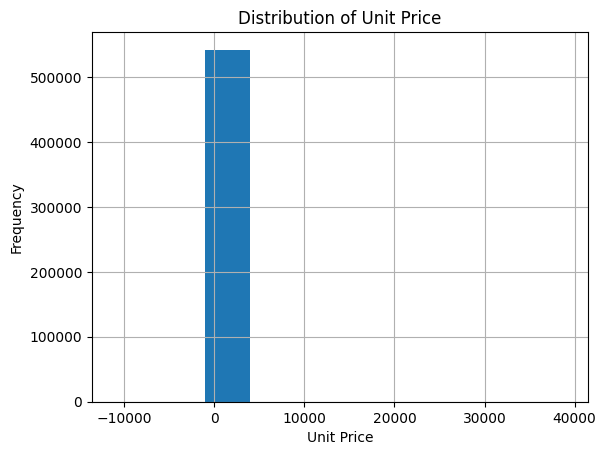

In [56]:
# Visualisasi distribusi kolom
df['UnitPrice'].hist()
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()
# Terapkan scaling pada kolom numerik yang sesuai
df[['Quantity', 'UnitPrice']] = scaler.fit_transform(df[['Quantity', 'UnitPrice']])
# Tampilkan hasil setelah scaling
print(df[['Quantity', 'UnitPrice']].head())

   Quantity  UnitPrice
0  0.500037   0.000065
1  0.500037   0.000087
2  0.500049   0.000071
3  0.500037   0.000087
4  0.500037   0.000087


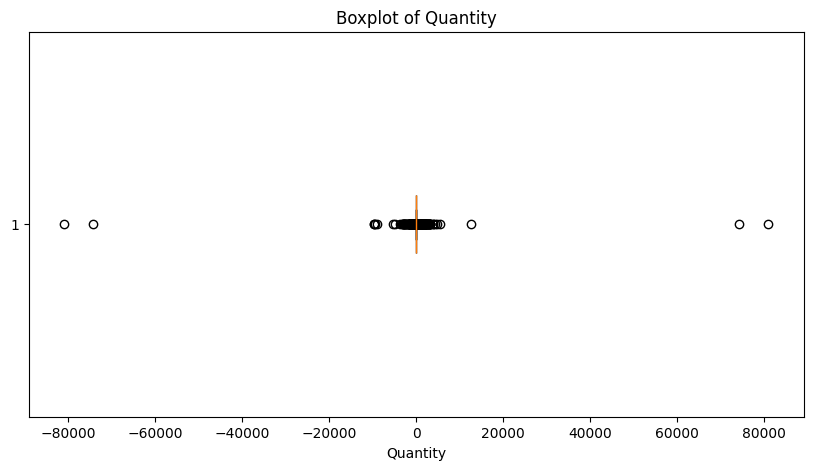

In [61]:
#  boxplot untuk Quantity
plt.figure(figsize=(10, 5))
plt.boxplot(df['Quantity'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot of Quantity')
plt.xlabel('Quantity')
plt.show()



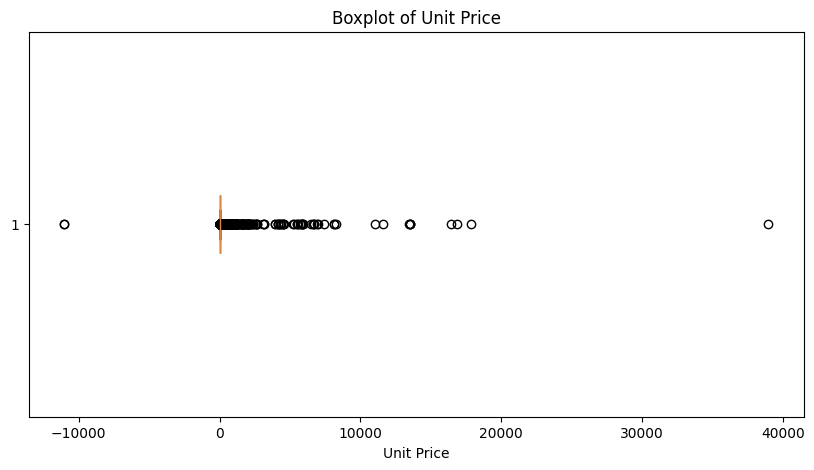

In [62]:
# Membuat boxplot untuk UnitPrice
plt.figure(figsize=(10, 5))
plt.boxplot(df['UnitPrice'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Boxplot of Unit Price')
plt.xlabel('Unit Price')
plt.show()

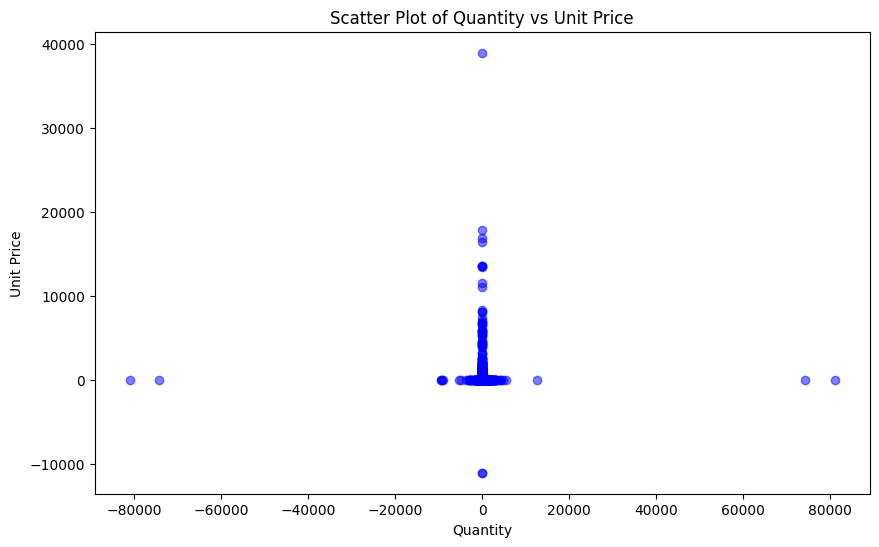

In [16]:
#scattler plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity'], df['UnitPrice'], alpha=0.5, c='blue')
plt.title('Scatter Plot of Quantity vs Unit Price')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.show()



<ipython-input-19-b2dbdcd8900e>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('InvoiceDate')['Quantity'].resample('M').sum().plot(figsize=(12, 6), color='green')


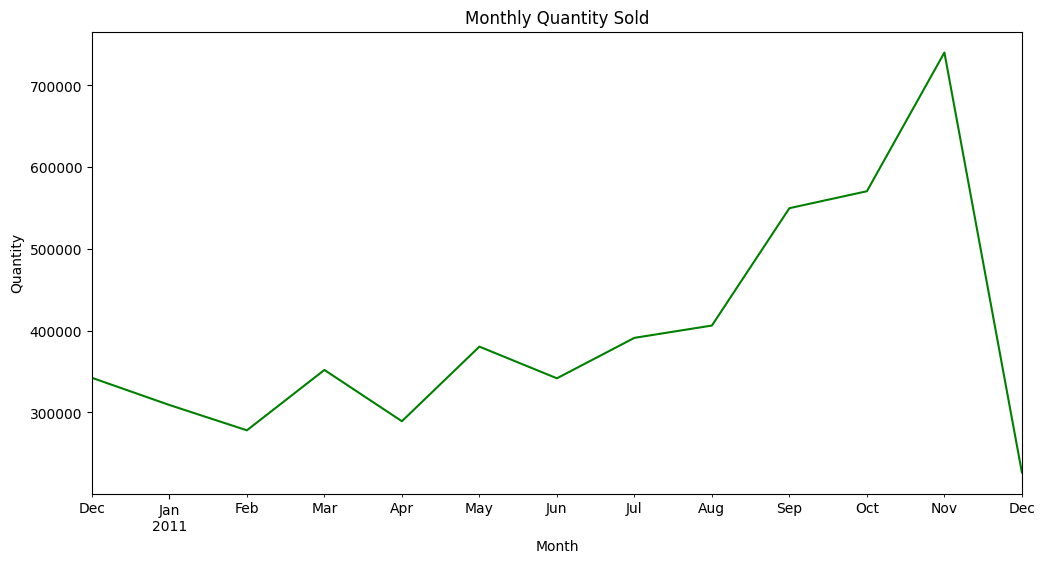

In [19]:
#Time Series Plot
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.set_index('InvoiceDate')['Quantity'].resample('M').sum().plot(figsize=(12, 6), color='green')
plt.title('Monthly Quantity Sold')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.show()


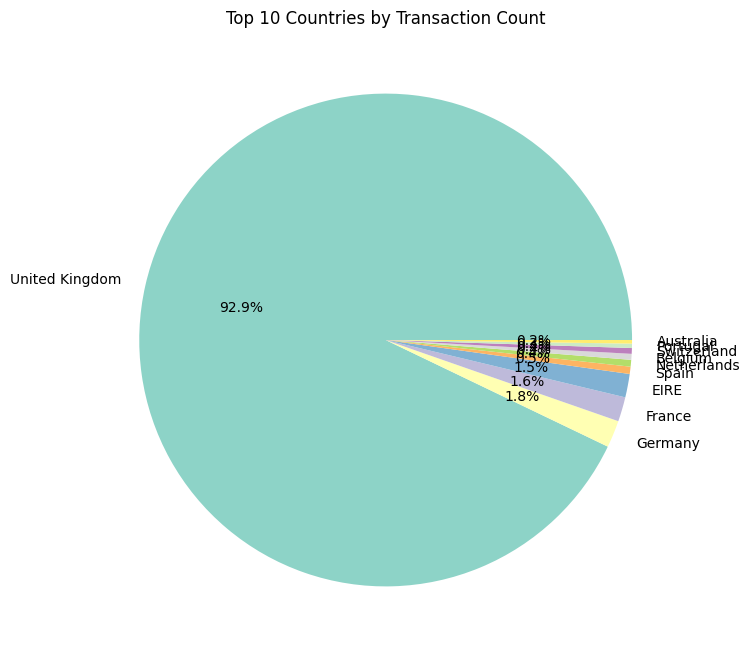

In [63]:
country_counts = df['Country'].value_counts().head(10)  # Hanya 10 negara teratas
country_counts.plot.pie(autopct='%1.1f%%', figsize=(8, 8), cmap='Set3')
plt.title('Top 10 Countries by Transaction Count')
plt.ylabel('')
plt.show()


In [20]:
S# Simpan file dalam format Excel
preprocessed_file = "preprocessed_data.xlsx"
df.to_excel(preprocessed_file, index=False)


In [21]:
from google.colab import files

# Unduh file
files.download(preprocessed_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>